In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Files to loac
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [5]:
# Read city data and ride data and store in dataframes
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [6]:
# Get columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Check for nulls by summing the data that is null/missing - if this returns 0 then there are not any null values in the column.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Check data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get unique values in the city type column to then use to count by city types
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [13]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [11]:
sum(city_data_df["type"]=="Suburban")

36

In [12]:
sum(city_data_df["type"]=="Rural")

18

In [14]:
# Inspect ride data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
# Check for null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
# check data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [21]:
# Merge dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [24]:
# create dataframes for each type of city
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [25]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [34]:
# Get number of rides for each city in city type DFs
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [36]:
# Get average fare for each city within each city type  -chain mean to groupby instead of count
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [38]:
# Get average number of drivers for each city within each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

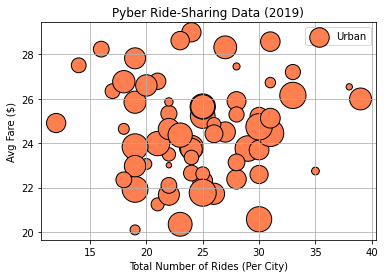

In [46]:
# Make scatter plots for each city type
# Urban
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=[value*10 for value in urban_driver_count],
            edgecolors="black",
            linewidths=1,
            color="coral",
            label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Avg Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

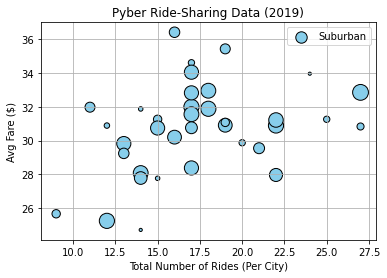

In [47]:
# Suburban
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=[value*10 for value in suburban_driver_count],
            edgecolors="black",
            linewidths=1,
            color="skyblue",
            label="Suburban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Avg Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

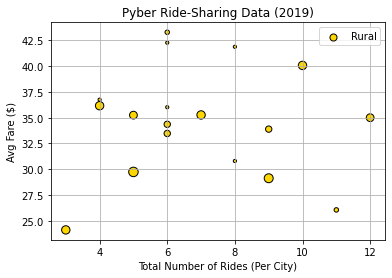

In [48]:
# Rural
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=[value*10 for value in rural_driver_count],
            edgecolors="black",
            linewidths=1,
            color="gold",
            label="Rural")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Avg Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

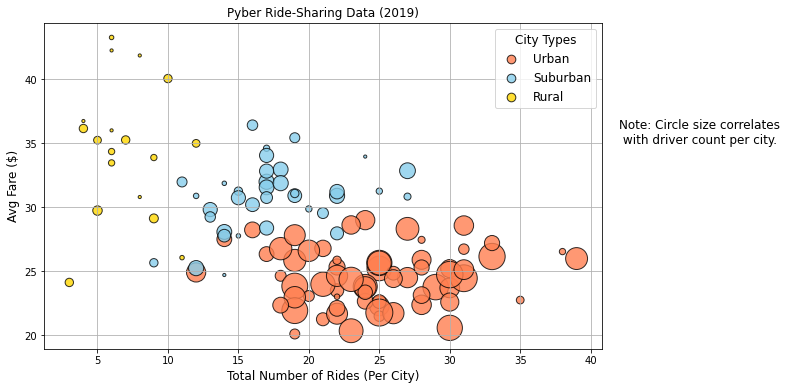

In [64]:
# Combine all the charts into one big chart - you can do that by running all of the scatters in one block of code - ?? How could you run them separately and then together outside of Jupyter notebook ?? Would you do the same thing and save each and then combine later on in the code?

plt.subplots(figsize=(10,6))
# Urban
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=[value*10 for value in urban_driver_count],
            edgecolors="black",
            linewidths=1,
            color="coral",
            alpha=0.8,
            label="Urban")

# Suburban
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=[value*10 for value in suburban_driver_count],
            edgecolors="black",
            linewidths=1,
            color="skyblue",
            alpha=0.8,
            label="Suburban")


# Rural
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=[value*10 for value in rural_driver_count],
            edgecolors="black",
            linewidths=1,
            color="gold",
            alpha=0.8,
            label="Rural")

# add formatting for title and axes
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Avg Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#create and format legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add note on bubble size
plt.text(42, 35, "Note: Circle size correlates\n with driver count per city.", fontsize="12")

# Save the chart created as a figure
plt.savefig("analysis/Fig1.png", bbox_inches='tight')

In [65]:
# use describe() to get high levels stats on the city types
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [66]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [67]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [69]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [71]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [72]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [73]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [74]:
# Calculate the mode of the ride count for each city type.
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [75]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [76]:
sts.mode(suburban_ride_count)

ModeResult(mode=array([17], dtype=int64), count=array([7]))

In [77]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [82]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
# Get summary stats for the fares
mean_urban_fares = np.mean(urban_fares)
median_urban_fares = np.median(urban_fares)
mode_urban_fares = sts.mode(urban_fares)

print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [85]:
# Get the fares for the urban cities.
suburban_fares = suburban_cities_df["fare"]
# Get summary stats for the fares
mean_suburban_fares = np.mean(suburban_fares)
median_suburban_fares = np.median(suburban_fares)
mode_suburban_fares = sts.mode(suburban_fares)

print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

print(f"The mode fare price for urban trips is {mode_suburban_fares}.")

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [87]:
# Get the fares for the urban cities.
rural_fares = rural_cities_df["fare"]
# Get summary stats for the fares
mean_rural_fares = np.mean(rural_fares)
median_rural_fares = np.median(rural_fares)
mode_rural_fares = sts.mode(rural_fares)

print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")

print(f"The mode fare price for urban trips is {mode_rural_fares}.")

The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


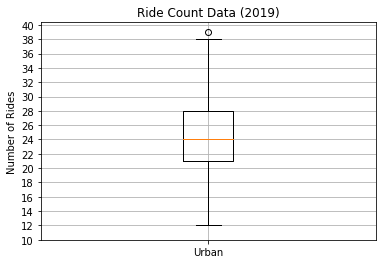

In [88]:
# Create box and whisker plot for urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

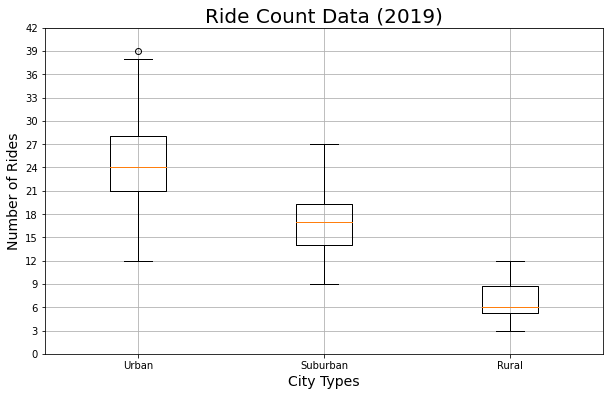

In [90]:
# Add all ride count data to summary box and whisker plots
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [91]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


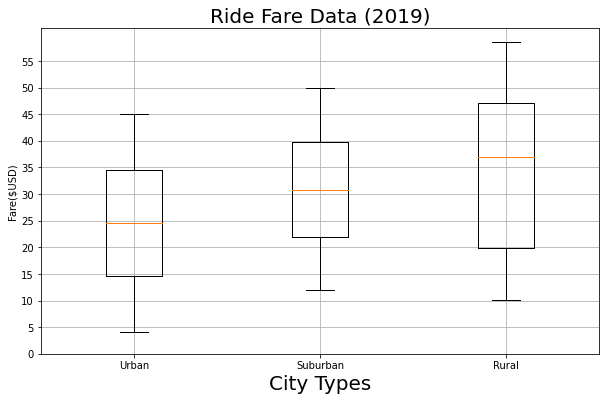

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

<Figure size 432x288 with 0 Axes>

In [98]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare($USD)')
ax.set_xlabel("City Types", fontsize=20)
ax.set_yticks(np.arange(0, 56, step=5.0))
ax.grid()
plt.show()
plt.savefig("analysis/Fig3.png")
print("Summary Statistics")
urban_fares.describe()
# suburban_fares.describe()
# rural_fares.describe()

In [100]:
# get total fares for each city type by using groupby on the original data
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [102]:
# get sum of all fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [103]:
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [104]:
# Calculate the percentage of fare for each city type. Doing all steps in one line
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

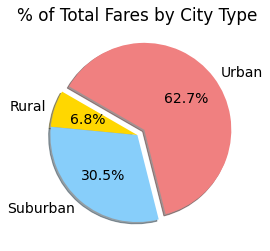

In [110]:
# import matplot lib library
import matplotlib as mpl
# create pie chart from the type_percents
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()